In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
profile_df = pd.read_csv('./data/user_profile.csv')
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [3]:
features = list(profile_df.columns[1:])
features

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [4]:
scaler = StandardScaler()
profile_df[features] = scaler.fit_transform(profile_df[features])


In [5]:
profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04
mean,1.064585e+06,1.173135e-17,8.924206e-17,1.089340e-17,-9.217489e-18,-1.072581e-16,4.943926e-17,1.298828e-17,7.206401e-17,4.357359e-17,-3.686996e-17,1.235982e-17,-6.536038e-17,1.194084e-17,1.089340e-17
std,4.976768e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.248117e-01,-8.261845e-01,-6.007357e-01,-7.612299e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-9.722184e-01,-6.581060e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
25%,6.814510e+05,-7.248117e-01,-8.261845e-01,-6.007357e-01,-7.612299e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-9.722184e-01,-6.581060e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
50%,1.044066e+06,-3.306305e-01,-1.164300e-01,-6.007357e-01,-1.309095e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-3.986448e-01,-3.809064e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
75%,1.451875e+06,4.577320e-01,5.933245e-01,1.803335e-01,4.994110e-01,-4.254443e-01,-1.007580e-02,-2.429002e-02,7.485024e-01,1.734929e-01,-4.386561e-01,-4.343241e-01,1.693832e-01,-2.316637e-01,5.197695e-01
max,2.103114e+06,7.552994e+00,3.432343e+00,9.292808e+00,9.323897e+00,5.947577e+00,7.776654e+00,4.116916e+01,5.145900e+00,6.826284e+00,5.248782e+00,7.250736e+00,1.200307e+01,1.077128e+01,5.647468e+00


In [6]:
features = profile_df.loc[:,profile_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.107663,2.486003,0.961403,8.273363,0.849160,6.478865,-0.02429,4.572326,5.024486,1.457157,7.250736,7.362409,6.370102,2.570849
1,4.530938,-0.353015,0.440690,5.121761,-0.425444,2.369203,-0.02429,2.851606,2.668290,-0.438656,2.127362,0.865482,-0.231664,0.519769
2,2.428638,1.066494,4.085680,4.281334,-0.425444,5.829971,-0.02429,3.233988,1.282291,1.457157,5.542945,5.506144,2.702454,2.570849
3,-0.462024,-0.826185,-0.600736,-0.341016,-0.425444,-0.658970,-0.02429,-0.972218,-0.380906,-0.438656,-0.434324,-0.526716,-0.231664,-0.505770
4,0.063551,-0.826185,-0.600736,0.079197,-0.425444,-0.658970,-0.02429,-0.972218,0.173493,-0.438656,0.419571,-0.526716,-0.231664,-0.505770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33913,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33914,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33915,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33916,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770


In [7]:
user_ids = profile_df.loc[:,profile_df.columns=='user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33913,2103110
33914,2103111
33915,2103112
33916,2103113


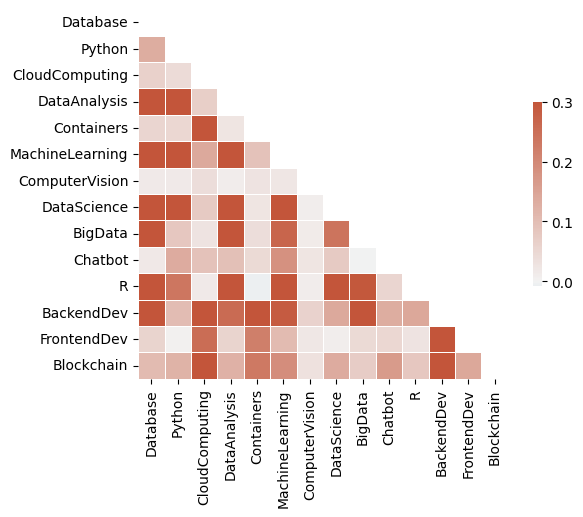

In [8]:
corr = features.cov()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [9]:
r = []
for n in range(1,15):
    pca = PCA(n_components=n)
    pca.fit(features)
    r.append(sum(pca.explained_variance_ratio_))
r

[0.2875549784391382,
 0.46307956995290567,
 0.5760975613035388,
 0.6487168497330354,
 0.7194584402653427,
 0.7881826233188987,
 0.8429277764531984,
 0.8944257484927842,
 0.927244264900406,
 0.9544369118259121,
 0.9733531494690764,
 0.9870311575671087,
 0.997915935924799,
 1.0000000000000002]

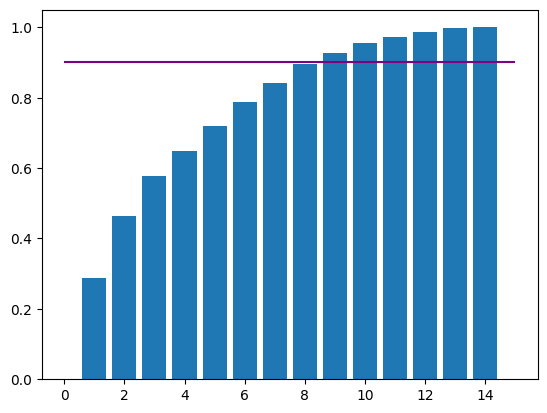

In [10]:
plt.bar(x=list(range(1,15)),height=r)
plt.hlines(y=0.9,xmax=15.0,xmin=0.0,colors='purple')
plt.show()

In [185]:
n = 14
pca = PCA(n_components=n)
features_red = pca.fit_transform(features)
rename_pc = ['pca'+str(i) for i in range(1,n+1)]
merged_pca_df = user_ids.join(pd.DataFrame(features_red, columns=rename_pc)).reset_index(drop=True)
merged_pca_df

,user,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,2,17.776505,0.214807,1.730334,2.561084,-3.815757,2.720025,0.667244,2.317686,0.869954,-1.067259,0.209856,1.421434,0.512784,0.438604
1,4,7.148912,-2.842153,2.359711,-0.578415,0.399162,-0.136375,0.547206,0.471087,0.033399,0.438769,1.485522,1.995260,0.257148,1.297424
2,5,11.365622,1.882749,-1.523602,1.072117,-1.706639,0.888501,1.663000,2.944416,2.097248,0.227474,2.634755,-0.260090,1.577088,0.363318
3,7,-1.833422,-0.279382,0.564884,0.054091,-0.064608,0.165841,0.031377,0.039270,0.210813,-0.315303,0.087603,0.304942,0.083061,0.013297
4,8,-1.048158,-0.685885,1.073001,0.006544,-0.005810,0.118987,0.116640,0.559713,0.186287,-0.680171,0.070842,0.186631,-0.037151,-0.013774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33913,2103110,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145,-0.317326,-1.030156,0.568478,0.166399,0.006995
33914,2103111,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145,-0.317326,-1.030156,0.568478,0.166399,0.006995
33915,2103112,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145,-0.317326,-1.030156,0.568478,0.166399,0.006995
33916,2103113,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145,-0.317326,-1.030156,0.568478,0.166399,0.006995


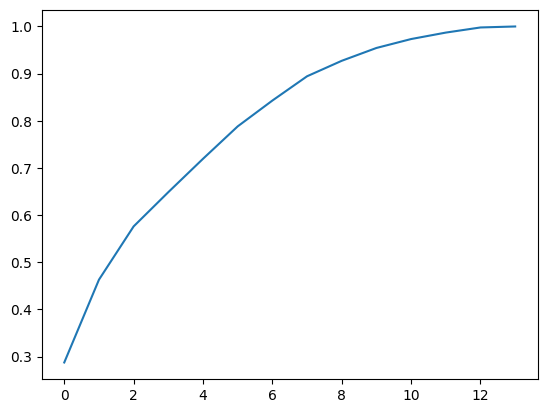

In [186]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

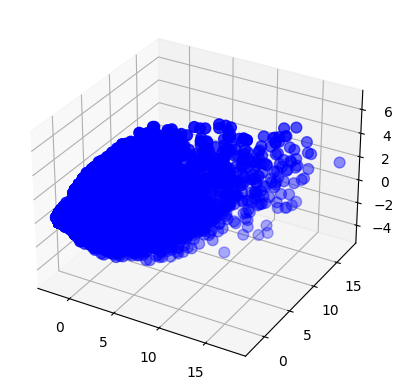

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(merged_pca_df['pca1'], merged_pca_df['pca1'], merged_pca_df['pca3'], c='blue', s=60)

In [188]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(merged_pca_df)

array([12, 12, 12, ...,  5,  5,  5])

In [189]:
clustered_users = user_ids.join(pd.DataFrame(model.labels_, columns=['cluster']))
clustered_users

,user,cluster
0,2,12
1,4,12
2,5,12
3,7,12
4,8,12
...,...,...
33913,2103110,5
33914,2103111,5
33915,2103112,5
33916,2103113,5


In [190]:
ratings_df = pd.read_csv('./data/ratings.csv')[['user','item']]
ratings_df.head()

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN


In [191]:
labelled = pd.merge(clustered_users, ratings_df, left_on='user', right_on='user')

labelled

,user,cluster,item
0,2,12,LB0105ENv1
1,2,12,ST0101EN
2,2,12,PY0101EN
3,2,12,ML0120ENv2
4,2,12,DA0101EN
...,...,...,...
233375,2103113,5,RAVSCTEST1
233376,2103114,5,GPXX0Z2PEN
233377,2103114,5,CNSC02EN
233378,2103114,5,GPXX0FTCEN


In [192]:
courses_clusters = labelled[['item','cluster']]
courses_clusters['count'] = [1] * len(courses_clusters)
courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()
courses_clusters

,cluster,item,enrollments
0,0,AI0111EN,6
1,0,BC0101EN,556
2,0,BC0201EN,133
3,0,BC0202EN,14
4,0,BD0101EN,940
...,...,...,...
1942,19,TA0105EN,25
1943,19,TA0106EN,58
1944,19,TMP0105EN,30
1945,19,TMP107,1


In [193]:
clustered_users.tail()

,user,cluster
33913,2103110,5
33914,2103111,5
33915,2103112,5
33916,2103113,5
33917,2103114,5


In [194]:
clustered_users[clustered_users['user']==2103111]

,user,cluster
33914,2103111,5


In [195]:
courses_clusters[courses_clusters['item'] == 'SW0101EN'].sort_values(by='enrollments',ascending=False)

,cluster,item,enrollments
190,1,SW0101EN,74
1037,10,SW0101EN,54
1837,18,SW0101EN,34
1128,11,SW0101EN,27
1631,16,SW0101EN,26
667,6,SW0101EN,25
759,7,SW0101EN,22
388,3,SW0101EN,21
94,0,SW0101EN,10
1538,15,SW0101EN,9


In [196]:
ratings_df

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN
...,...,...
233692,2103113,RAVSCTEST1
233693,2103114,GPXX0Z2PEN
233694,2103114,CNSC02EN
233695,2103114,GPXX0FTCEN


In [197]:

def generate_recommendations(user_id):
    courses_clusters = labelled[['item','cluster']]
    courses_clusters['count'] = [1] * len(courses_clusters)
    courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()

    recommend = {}
    union_courses=set()
    d_user = labelled[labelled['user']==user_id]
    cluster = d_user['cluster'].iloc[0]
    all_courses_cluster = courses_clusters[courses_clusters['cluster']==cluster]
    all_courses_cluster = all_courses_cluster.sort_values(by='enrollments').iloc[:10,1].values
    user_courses = d_user['item'].values
    new_courses = list(set(all_courses_cluster).difference(set(all_courses_cluster).intersection(user_courses)))
    recommend[user_id] = new_courses
    union_courses = union_courses.union(set(new_courses))
    return union_courses,recommend

In [198]:
labelled[labelled['item']=='LB0101ENv1']

,user,cluster,item
23,2,12,LB0101ENv1
187,12,12,LB0101ENv1
619,7764,12,LB0101ENv1
768,16164,12,LB0101ENv1
910,23877,12,LB0101ENv1
...,...,...,...
230874,2045858,5,LB0101ENv1
230905,2046241,5,LB0101ENv1
230948,2046749,5,LB0101ENv1
231458,2057016,5,LB0101ENv1


In [222]:
user_id = 23877					
d_user = labelled[labelled['user'] == user_id]
d_user.loc[:,['item']].values

array([['LB0109ENv1'],
       ['LB0105ENv1'],
       ['LB0103ENv1'],
       ['LB0101ENv1'],
       ['LB0111EN'],
       ['LB0107ENv1']], dtype=object)

In [223]:
union_courses,recommend = generate_recommendations(user_id)
avail = list(union_courses)
user_recommendations = pd.DataFrame([[user]+[courses.count(c) for c in avail] for user,courses in recommend.items()],columns=['user']+avail)

In [250]:
ll = list(user_recommendations.columns[1:])
recom = {len(ll) - i: ll[i] for i in range(len(ll))}
recom

{10: 'HCC105EN',
 9: 'GPXX0T0FEN',
 8: 'TMP107',
 7: 'ST0301EN',
 6: 'DX0107EN',
 5: 'RAVSCTEST1',
 4: 'ST0201EN',
 3: 'DX0108EN',
 2: 'SW0101EN',
 1: 'DX0106EN'}